# Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## 1. Introduction

<!-- **Task 1**  
- Codecademy University’s Data Science department is interested in creating a model to predict whether or not a student will pass the final exam of its Introductory Machine Learning course. 
- They plan to accomplish this by building a logistic regression model that predicts the probability of passing based on the number of hours a student reports studying.
- Run the code to plot the data. 
- `0` indicates that a student failed the exam, and `1` indicates a student passed the exam.
- How many hours does a student need to study to pass the exam? -->

**Task 1**  
- Codecademy University’s Data Science department is interested in creating a model to predict whether or not a student will pass the final exam of its Introductory Machine Learning course. 
- They plan to accomplish this by building a logistic regression model that predicts the probability of passing based on the number of hours a student reports studying.
- Run the code to plot the data. 
- `0` indicates that a student failed the exam, and `1` indicates a student passed the exam.
- How many hours does a student need to study to pass the exam?

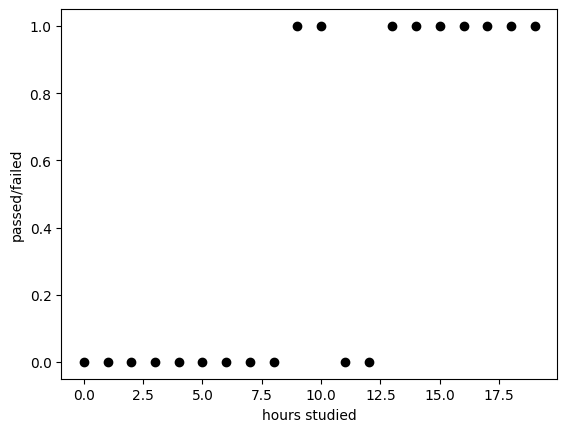

In [3]:
codecademyU = pd.read_csv('codecademyU.csv')

plt.scatter(x = 'hours_studied', y = 'passed_exam', data = codecademyU, color='black')
plt.ylabel('passed/failed')
plt.xlabel('hours studied')
plt.show()

## 2. Linear Regression Approach

**Task 1**  
- We’ve provided you with the code to train a linear regression model on the Codecademy University data and plot the regression line. 
- Run the code and observe the plot. 
- Expand the plot to fullscreen for a larger view.
- Using the regression line, estimate the predicted outcomes (given by the line) for students who study `0` hour, `10` hours, and `30` hours, respectively. 
- Save the results to `slacker`, `average`, and `studious`.
- How would you use these numerical outcomes to determine whether a student is predicted to pass or fail? 
- Can you think of a threshold you might use?

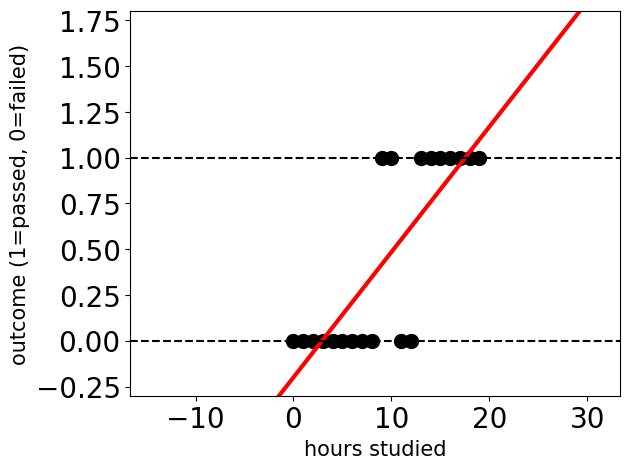

In [ ]:
codecademyU = pd.read_csv('codecademyU.csv')

# Define slacker, average, and studious below
slacker = -0.2
average = 0.5
studious = 1.75

# Fit a linear model
model = LinearRegression()
model.fit(codecademyU[['hours_studied']].values, codecademyU[['passed_exam']].values)

# Get predictions from the linear model
sample_x = np.linspace(-16.65, 33.35, 300).reshape(-1,1)
predictions = model.predict(sample_x)

# Plot the data
plt.scatter(x = 'hours_studied', y = 'passed_exam', data = codecademyU, color='black', s=100)

# Plot the line
plt.plot(sample_x, predictions, color='red', linewidth=3)

# Customization for readability
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

# Label plot and set limits
plt.ylabel('outcome (1=passed, 0=failed)', fontsize = 15)
plt.xlabel('hours studied', fontsize = 15)
plt.xlim(-16.65, 33.35)
plt.ylim(-.3, 1.8)

# Show the plot
plt.tight_layout()
plt.show()

## 3. Logistic Regression

**Task 1**  
- We’ve provided the code to build a logistic regression model on the Codecademy University data and plot the fitted curve. 
- Take a look at the plot. Expand the plot to fullscreen for a larger view.
- Using this curve, estimate the probability that a student who studied for five hours will pass the exam. 
- Save the result as `five_hour_studier`.

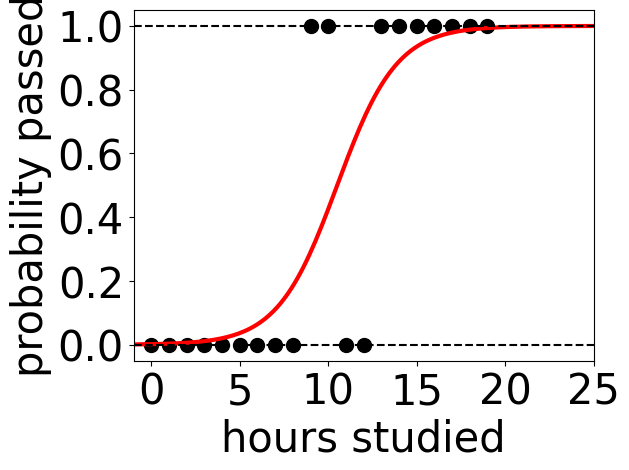

In [ ]:
codecademyU = pd.read_csv('codecademyU.csv')

# Define five_hour_studier below
five_hour_studier = 0.05

# Fit the logistic regression model
hours_studied = codecademyU[['hours_studied']].values
passed_exam = np.ravel(codecademyU[['passed_exam']])
model = LogisticRegression()
model.fit(hours_studied,passed_exam)

# Plug sample data into fitted model
sample_x = np.linspace(-16.65, 33.35, 300).reshape(-1,1)
probability = model.predict_proba(sample_x)[:,1]

# Plot exam data
plt.scatter(hours_studied, passed_exam, color='black', s=100)

# Plot logistic curve
plt.plot(sample_x, probability, color='red', linewidth=3)

# Customization for readability
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

# Label plot and set limits
plt.ylabel('probability passed', fontsize = 30)
plt.xlabel('hours studied', fontsize = 30)
plt.xlim(-1, 25)
plt.tight_layout()

# Show the plot
plt.show()

## 4. Log-Odds

**Task 1**  
- Suppose that there is a 40% probability of rain today (p = 0.4). Calculate the odds of rain and save it as `odds_of_rain`. 
- Note that the odds are less than 1 because the probability of rain is less than 0.5.
- Feel free to print `odds_of_rain` to see the results.

<br>

**Task 2**  
- Use the odds that you calculated above to calculate the log odds of rain and save it as `log_odds_of_rain`. 
- You can calculate the natural log of a value using the `numpy.log()` function. 
- Note that the log odds are negative because the probability of rain was less than 0.5.
- Feel free to print `log_odds_of_rain` to see the results.

<br>

**Task 3**  
- Suppose that there is a 90% probability that my train to work arrives on-time. 
- Calculate the odds of my train being on-time and save it as `odds_on_time`. 
- Note that the odds are greater than 1 because the probability is greater than 0.5.
- Feel free to print `odds_on_time` to see the results.

<br>

**Task 4**  
- Use the odds that you calculated above to calculate the log odds of an on-time train and save it as `log_odds_on_time`. 
- Note that the log odds are positive because the probability of an on-time train was greater than 0.5.
- Feel free to print `log_odds_on_time` to see the results.

In [29]:
codecademyU = pd.read_csv('codecademyU.csv')
hours_studied = codecademyU[['hours_studied']].values
calculated_coefficients = np.array([[0.20678491]])
intercept = np.array([-1.76125712])

In [34]:
# Task 1
odds_of_rain = 0.4/0.6
print(odds_of_rain)

# Task 2
log_odds_of_rain = np.log(odds_of_rain)
print(log_odds_of_rain)

# Task 3
odds_on_time = 0.9/0.1
print(odds_on_time)

# Task 4
log_odds_on_time = np.log(odds_on_time)
print(log_odds_on_time)

0.6666666666666667
-0.4054651081081643
9.0
2.1972245773362196


## 5. Sigmoid Function

**Task 1**  
- We’ve fit a logistic regression on the Codecademy University data and saved the intercept and coefficient on `hours_studied` as `intercept` and `coef`, respectively.
- For each student in the dataset, use the intercept and coefficient to calculate the log odds of passing the exam. 
- Save the result as `log_odds`.

<br>

**Task 2**  
- Now, convert the predicted log odds for each student into a predicted probability of passing the exam. 
- Save the predicted probabilities as `pred_probability_passing`.

In [37]:
codecademyU = pd.read_csv('codecademyU.csv')

# Fit the logistic regression model
hours_studied = codecademyU[['hours_studied']].values
passed_exam = np.ravel(codecademyU[['passed_exam']])
model = LogisticRegression()
model.fit(hours_studied,passed_exam)

# Save intercept and coef
intercept = model.intercept_
coef = model.coef_

# Calculate log_odds here
log_odds = intercept + coef*hours_studied
print(log_odds)

# Calculate pred_probability_passing here
pred_probability_passing = np.exp(log_odds) / (1 + np.exp(log_odds))
print(pred_probability_passing)

[[-6.23665281]
 [-5.64300121]
 [-5.0493496 ]
 [-4.45569799]
 [-3.86204638]
 [-3.26839478]
 [-2.67474317]
 [-2.08109156]
 [-1.48743996]
 [-0.89378835]
 [-0.30013674]
 [ 0.29351487]
 [ 0.88716647]
 [ 1.48081808]
 [ 2.07446969]
 [ 2.6681213 ]
 [ 3.2617729 ]
 [ 3.85542451]
 [ 4.44907612]
 [ 5.04272773]]
[[0.00195257]
 [0.00352972]
 [0.00637263]
 [0.01147892]
 [0.02059199]
 [0.03667149]
 [0.06448026]
 [0.11094825]
 [0.18430629]
 [0.29032866]
 [0.42552406]
 [0.57285641]
 [0.70830509]
 [0.81469612]
 [0.88839689]
 [0.93511914]
 [0.96309386]
 [0.97927404]
 [0.9884457 ]
 [0.9935853 ]]


## 6. Fitting a model in sklearn

**Task 1**  
- We’ve pre-processed this data and split it into training and test sets as follows:
    - `X_train` is the feature matrix, containing standardized training data for hours studied and practice test score
    - `y_train` contains the outcome variable for the training data: whether or not each student passed the final exam (1 indicates passing, 0 indicates failing)
- Create a `LogisticRegression` object named `cc_lr` and fit it to the provided training data.

<br>

**Task 2**  
- Print out the coefficients and intercept for the model. 
- Are the coefficients positive or negative and does this match your expectation? 
- Which feature (hours studied or practice test score) is more strongly associated with students’ probability of passing the final exam?

In [ ]:
codecademyU = pd.read_csv('codecademyU.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression()
cc_lr.fit(X_train, y_train)

# Print the intercept and coefficients here:
print(cc_lr.intercept_) 
print(cc_lr.coef_)

[-0.13193653]
[[1.51032451 0.11984701]]


Both coefficients are positive, which makes sense: we expect students who study more and earn higher grades on the practice test to be more likely to pass the final exam. The coefficient on hours_studied is larger than the coefficient on practice_test, suggesting that hours_studied is more strongly associated with students’ probability of passing.

## 7. Predictions in sklearn

**Task 1**  
- We’ve fit the same logistic regression model on the `CodecademyU` training data. - We’ve also created `X_test` and `y_test`, which contain the testing data.
- Use the `.predict()` method to predict whether the students in the test dataset will pass the final exam, then print out the resulting vector of predictions.

<br>

**Task 2**  
- Now, use the `.predict_proba()` method to calculate the predicted probability that each student in the test dataset will pass the exam. 
- Print out the results.

<br>

**Task 3**  
- Print out `y_test` to see whether the students in the test dataset actually passed the exam. 
- Did the model make accurate predictions? Looking at the probabilities, do the misclassification(s) make sense?

In [ ]:
codecademyU = pd.read_csv('codecademyU.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
cc_lr = LogisticRegression()
cc_lr.fit(X_train,y_train)

# Print out the predicted outcomes for the test data
print(cc_lr.predict(X_test))

# Print out the predicted probabilities for the test data
print(cc_lr.predict_proba(X_test))

# Print out the true outcomes for the test data
print(y_test)

[0 1 0 1 1]
[[0.67942358 0.32057642]
 [0.20680975 0.79319025]
 [0.94454394 0.05545606]
 [0.42257111 0.57742889]
 [0.12928955 0.87071045]]
7     0
15    1
0     0
11    0
17    1
Name: passed_exam, dtype: int64


You should see that the fourth datapoint was incorrectly classified as having passed the exam; however, the predicted probability of passing for this datapoint was only 57.7%, which is much lower than the other students who were correctly predicted to pass the exam (79.3% and 87.1%, respectively).

## 8. Classification Thresholding

**Task 1**  
- We’ve fit the same logistic regression model on the `CodecademyU` training data. 
- We’ve also printed the predicted classes and true classes for the test data.
- Take a look at the predicted probability of passing the exam for the mis-classified datapoint. 
- The `.predict()` method uses a default threshold of 0.5 for predicting group membership. 
- For this example, we could correctly classify all five datapoints in the test dataset using a different threshold.
- Set the value of `alternative_threshold` to any value that would accomplish this.


In [ ]:
# Pick an alternative threshold here:
alternative_threshold  = 0.6

codecademyU = pd.read_csv('codecademyU.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
cc_lr = LogisticRegression()
cc_lr.fit(X_train,y_train)

# Print out the predicted outcomes for the test data
print(cc_lr.predict(X_test))

# Print out the predicted probabilities for the test data
print(cc_lr.predict_proba(X_test)[:,1])

# Print out the true outcomes for the test data
print(y_test)

[0 1 0 1 1]
[0.32057642 0.79319025 0.05545606 0.57742889 0.87071045]
7     0
15    1
0     0
11    0
17    1
Name: passed_exam, dtype: int64


## 9. Confusion matrix

**Task 1**  
- We’ve fit the same logistic regression model on the `codecademyU` training data and made predictions for the test data. 
- `y_test` contains the true classes and `y_pred` contains the predicted classes.
- Create and print a confusion matrix for this data. 
- How many incorrect classifications were there (false positives or false negatives)?

In [48]:
# Import pandas and the data
codecademyU = pd.read_csv('codecademyU.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
cc_lr = LogisticRegression()
cc_lr.fit(X_train,y_train)

# Save and print the predicted outcomes
y_pred = cc_lr.predict(X_test)
print('predicted classes: ', y_pred)

# Print out the true outcomes for the test data
print('true classes: ', y_test)

# Print out the confusion matrix here
print(confusion_matrix(y_test, y_pred))

predicted classes:  [0 1 0 1 1]
true classes:  7     0
15    1
0     0
11    0
17    1
Name: passed_exam, dtype: int64
[[2 1]
 [0 2]]


## 10. Accuracy, Recall, Precision, F1 Score

**Task 1**  
- We’ve fit the same logistic regression model on the `codecademyU` training data and made predictions for the test data. `y_pred` contains the predicted classes and `y_test` contains the true classes.
- Also, note that we’ve changed the train-test split (by using a different value for the `random_state` parameter, making the confusion matrix different from the one you saw in the previous exercise.
- Calculate the accuracy for the model and print it out.

<br>

**Task 2**  
- Calculate the F1 score for the model and print it out.

In [51]:
# Import pandas and the data
codecademyU = pd.read_csv('codecademyU.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 51)

# Create and fit the logistic regression model here:
cc_lr = LogisticRegression()
cc_lr.fit(X_train,y_train)

# Save and print the predicted outcomes
y_pred = cc_lr.predict(X_test)
print('predicted classes: ', y_pred)

# Print out the true outcomes for the test data
print('true classes: ', y_test)

# Print out the confusion matrix
print('confusion matrix: ')
print(confusion_matrix(y_test, y_pred))

# Print accuracy here:
print(accuracy_score(y_test, y_pred))

# Print F1 score here:
print(f1_score(y_test, y_pred))


predicted classes:  [0 1 1 0 0]
true classes:  1     0
12    0
15    1
2     0
7     0
Name: passed_exam, dtype: int64
confusion matrix: 
[[3 1]
 [0 1]]
0.8
0.6666666666666666


## 11. Review

**Task 1**
- Find another dataset for binary classification from [Kaggle](https://www.kaggle.com/datasets) or take a look at [`sklearn`‘s breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Use sklearn to build your own Logistic Regression model on the data and make some predictions. 
- Which features are most important in the model you build?

In [57]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
features = data.data
target = data.target
df = pd.DataFrame(features, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=data.feature_names)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
# Standardized data = mean -> 0, std -> 1
# Check the mean and std of the standardized data
df_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [67]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9941520467836257

In [68]:
confusion_matrix(y_test, y_pred)

array([[ 67,   1],
       [  0, 103]])

In [69]:
accuracy_score(y_test, y_pred)

0.9941520467836257

In [70]:
precision_score(y_test, y_pred)

0.9903846153846154

In [72]:
recall_score(y_test, y_pred)

1.0

In [73]:
f1_score(y_test, y_pred)

0.9951690821256038